In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
datatype = {'key' : 'object', 'fare_amount' : 'float64', 
            'pickup_datetime' : 'object', 'pickup_longitude' : 'float64', 'pickup_latitude' : 'float64', 
            'dropoff_longitude' : 'float64', 'dropoff_latitude' : 'float64',
            'passenger_count' : 'int64'}

# Load the dataset

df_raw = pd.read_csv(r'E:\Programs\Python\Projects\Taxi Fare\train.csv', low_memory= False, nrows = 200000, dtype=datatype, parse_dates = ['pickup_datetime'])
df_raw.drop(['key'], axis = 1, inplace = True)

# Display the first few rows of the dataset

df_raw.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


**Data Dictionary**
- pickup_datetime : Timestamp value indicating when ride started.
- pickup_longitude : Longitude coordinate of where the taxi ride started
- pickup_latitude : Latitude coordinate of where the taxi ride started
- dropoff_longitude : Longitude coordinate of where the taxi ride ended
- dropoff_latitude : Latitude coordinate of where the taxi ride ended
- passenger_count : The number of passengers in the taxi ride

__Target__
- fare_amount : The total fare for the taxi ride


In [4]:
# Creating datetime features based on pickup_datetime
import calendar

df_raw['pickup_date'] = df_raw['pickup_datetime'].dt.date
df_raw['pickup_day'] = df_raw['pickup_datetime'].apply(lambda x : x.day)
df_raw['pickup_hour'] = df_raw['pickup_datetime'].apply(lambda x : x.hour)
df_raw['pickup_day_of_week'] = df_raw['pickup_datetime'].apply(lambda x : calendar.day_name[x.weekday()])
df_raw['pickup_month'] = df_raw['pickup_datetime'].apply(lambda x : x.month)
df_raw['pickup_year'] = df_raw['pickup_datetime'].apply(lambda x : x.year)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [5]:
# Describing Data
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445,15.684460,13.519390,6.272325,2011.74044
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730,8.673334,6.505652,3.443968,1.86228
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000,1.000000,0.000000,1.000000,2009.00000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000,8.000000,9.000000,3.000000,2010.00000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000,16.000000,14.000000,6.000000,2012.00000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000,23.000000,19.000000,9.000000,2013.00000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,31.000000,23.000000,12.000000,2015.00000


**Summary**
- Minimum fare amount is negative
- Minimum and Maximum longitude and latitude look unreal, should be between -74 and 41
- Minimum passenger count is 0

Remove 0 passenger count.

The taxi fare initial charge is $2.5, so we are removing fare amountsmaller than this amount

In [6]:
# Removing Outlier Value
df_raw = df_raw[((df_raw['pickup_longitude'] > -78) &
                 (df_raw['pickup_longitude'] < -70)) &
                ((df_raw['dropoff_longitude'] > -78) &
                 (df_raw['dropoff_longitude'] < -70)) &            
                ((df_raw['pickup_latitude'] > 37) & 
                 (df_raw['pickup_latitude'] < 45)) & 
                ((df_raw['dropoff_latitude'] > 37) &  
                 (df_raw['dropoff_latitude'] < 45)) &
                (df_raw['passenger_count'] > 0) & 
                (df_raw['fare_amount'] >= 2.5)]

In [7]:
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,195182.000000,195182.000000,195182.000000,195182.000000,195182.000000,195182.000000,195182.000000,195182.000000,195182.000000,195182.000000
mean,11.338044,-73.975204,40.751025,-73.974123,40.751376,1.688552,15.680119,13.517630,6.274718,2011.739315
std,9.770466,0.042920,0.035034,0.041130,0.037207,1.305024,8.673414,6.502983,3.445185,1.867276
min,2.500000,-76.531073,37.419853,-76.462462,37.346533,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992265,40.736626,-73.991475,40.735654,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982045,40.753523,-73.980503,40.753950,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968299,40.767547,-73.965178,40.768379,2.000000,23.000000,19.000000,9.000000,2013.000000
max,500.000000,-70.140793,43.183332,-71.038222,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [8]:
df_raw.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

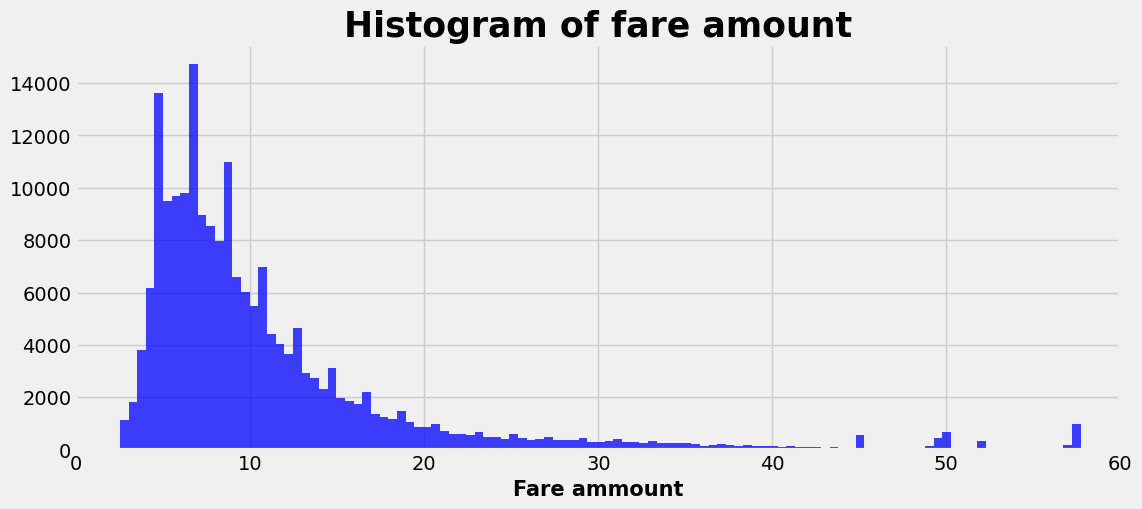

In [9]:
#Visualising target variable
plt.figure(figsize=(12, 5))
n, bins, patches = plt.hist(df_raw.fare_amount, 1000, facecolor = 'blue', alpha = 0.75)
plt.xlabel('Fare ammount', fontsize = 15, fontweight = 'bold')
plt.title('Histogram of fare amount', fontsize = 25, fontweight = 'bold')
plt.xlim(0, 60)
plt.show()

Text(0.5, 1.0, 'Distribution of Fare Amount in Log scale')

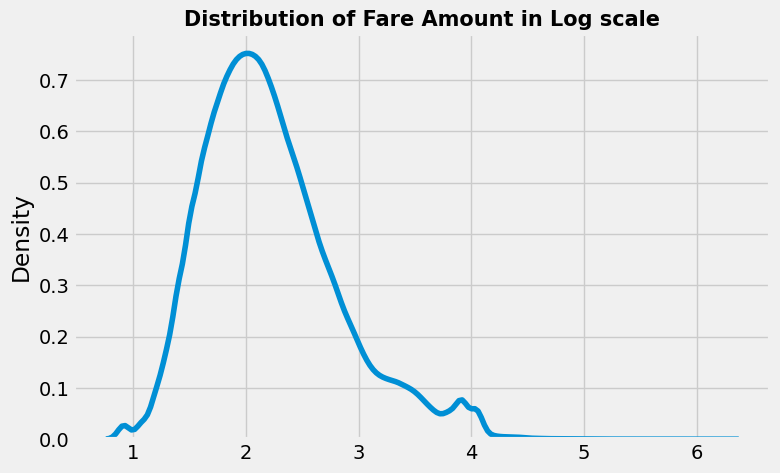

In [10]:
plt.figure(figsize = (8, 5))
sns.kdeplot(np.log(df_raw['fare_amount'].values)).set_title('Distribution of Fare Amount in Log scale', fontsize = 15, fontweight = 'bold')

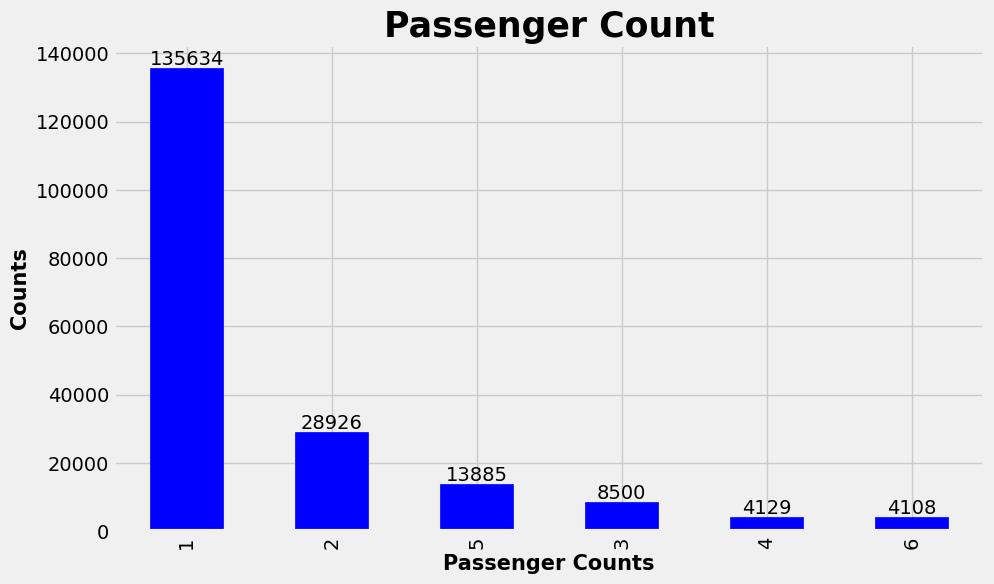

In [11]:
#Passenger Count
plt.figure(figsize = (10, 6))
df_raw['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'b')
plt.title('Passenger Count', fontsize = 25, fontweight = 'bold')
plt.xlabel('Passenger Counts', fontsize = 15, fontweight = 'bold')
plt.ylabel('Counts', fontsize = 15, fontweight = 'bold')

for index, values in enumerate(df_raw['passenger_count'].value_counts()):
    plt.text(index, values + 1000, str(values), ha = 'center')

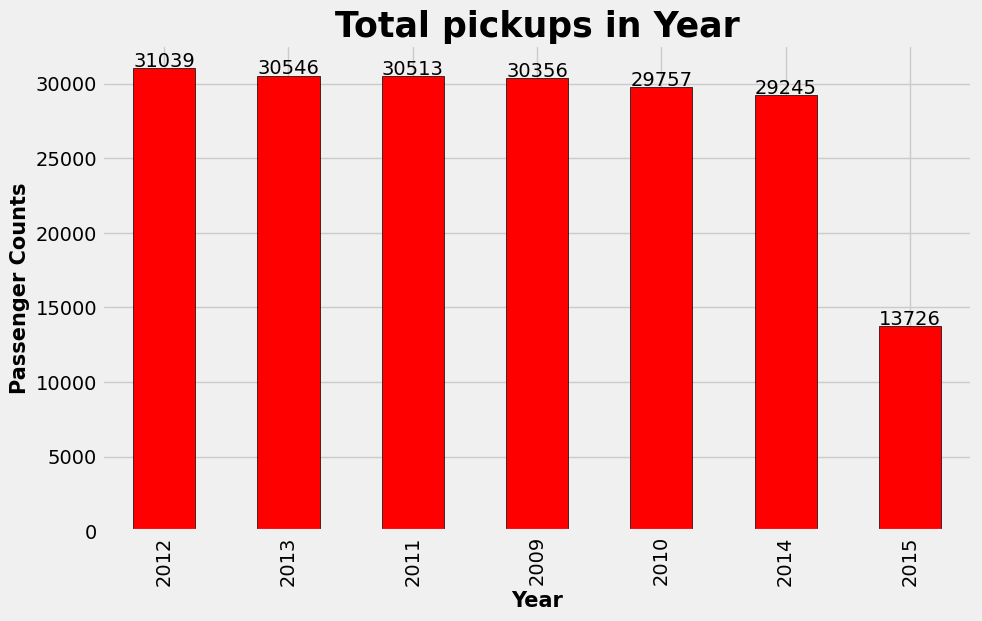

In [12]:
plt.figure(figsize = (10, 6))
df_raw['pickup_year'].value_counts().plot.bar(color = 'r', edgecolor = 'k')
plt.title('Total pickups in Year', fontsize = 25, fontweight = 'bold')
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.ylabel('Passenger Counts', fontsize = 15, fontweight = 'bold')

for index, values in enumerate(df_raw['pickup_year'].value_counts()):
    plt.text(index, values + 100, str(values), ha = 'center')

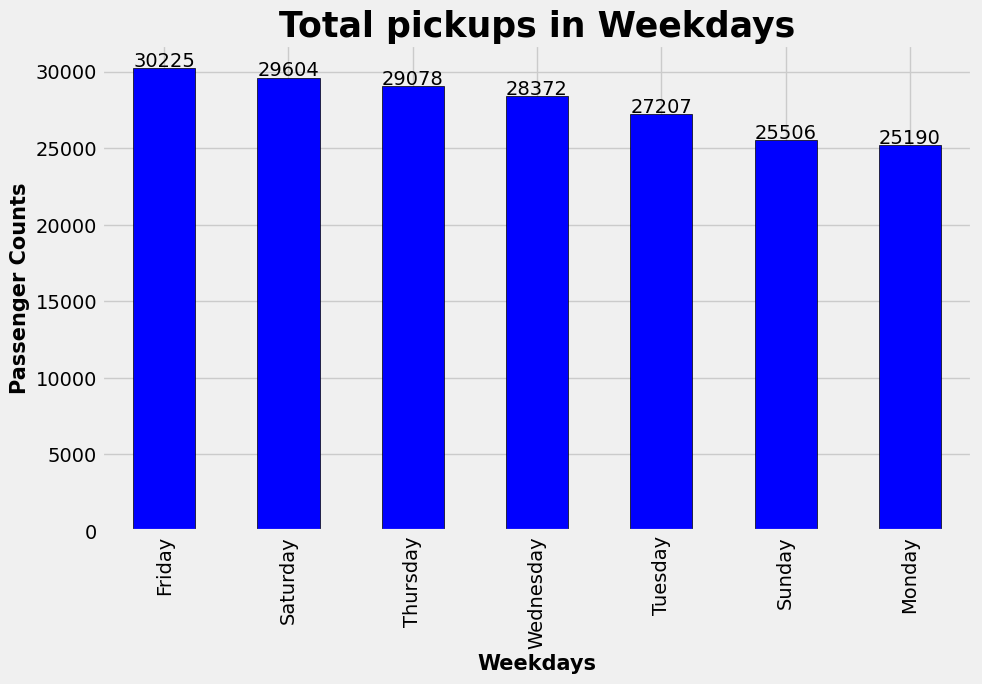

In [13]:
plt.figure(figsize = (10, 6))
df_raw['pickup_day_of_week'].value_counts().plot.bar(color = 'b', edgecolor = 'k')
plt.title('Total pickups in Weekdays', fontsize = 25, fontweight = 'bold')
plt.xlabel('Weekdays', fontsize = 15, fontweight = 'bold')
plt.ylabel('Passenger Counts', fontsize = 15, fontweight = 'bold')

for index, values in enumerate(df_raw['pickup_day_of_week'].value_counts()):
    plt.text(index, values + 100, str(values), ha = 'center')

(-74.03, -73.75)

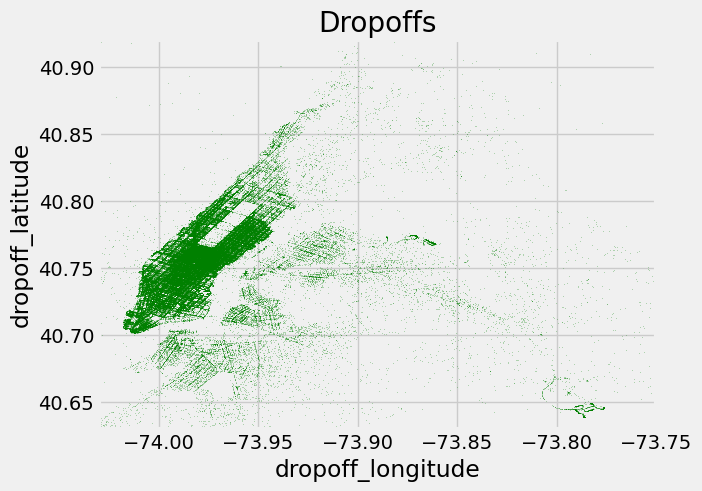

In [14]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.92)

df_raw.plot(kind = 'scatter', x = 'dropoff_longitude', y = 'dropoff_latitude', color = 'green', s = .02, alpha = .6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

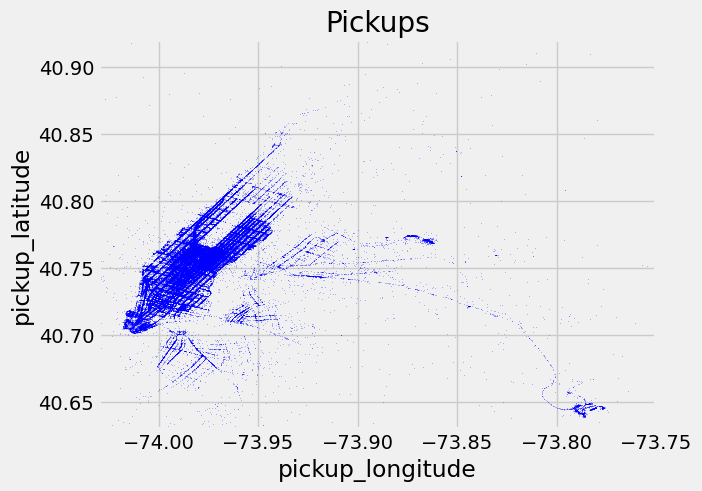

In [15]:
df_raw.plot(kind = 'scatter', x = 'pickup_longitude', y = 'pickup_latitude', color = 'blue', s = .02, alpha = .6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

**How to Calculate Distance between 2 Geolocations**

Introducing Haversine Distance

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.



In [16]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - np.cos((lat2 - lat1) * p) / 2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

df_raw['distance_miles'] = distance(df_raw.pickup_latitude, df_raw.pickup_longitude, df_raw.dropoff_latitude, df_raw.dropoff_longitude)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


Text(0.5, 1.0, 'Distribution Distance in Miles')

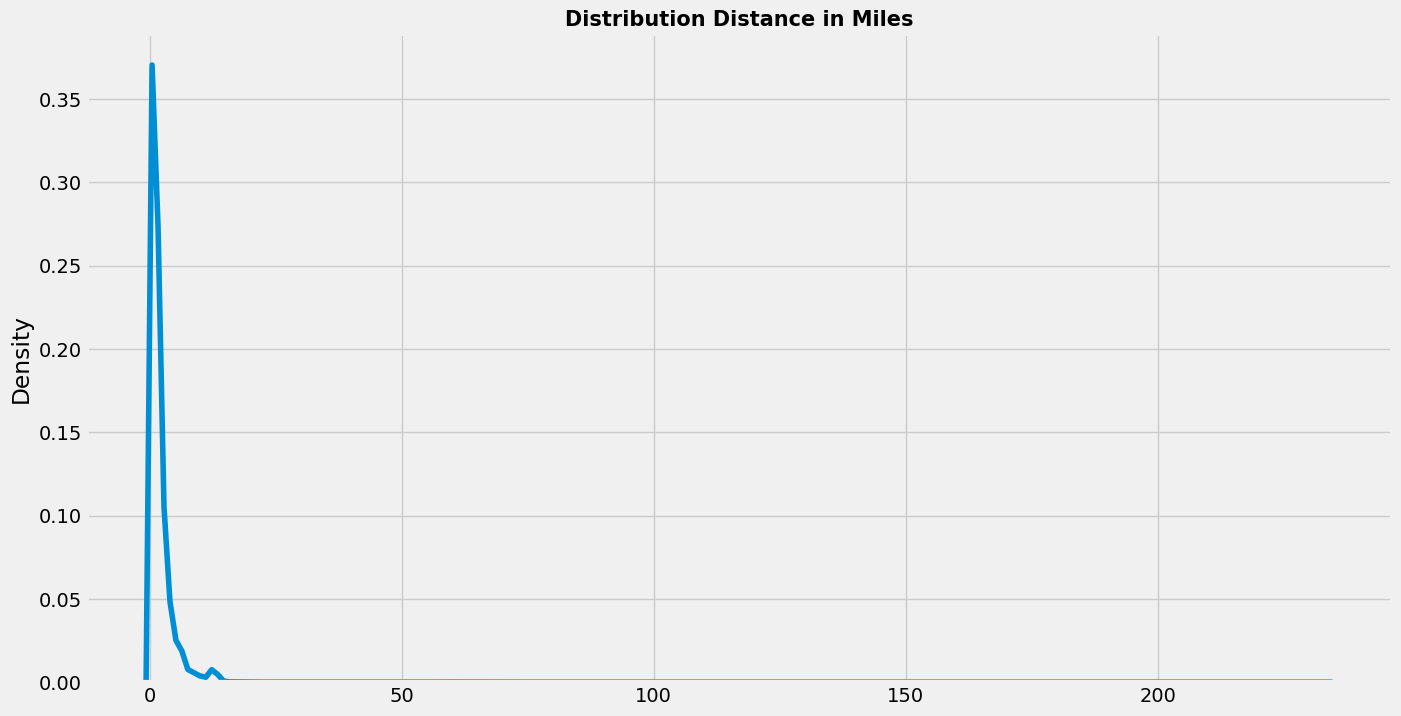

In [17]:
plt.figure(figsize = (15, 8))
sns.kdeplot(df_raw['distance_miles'].values).set_title('Distribution Distance in Miles', fontsize = 15, fontweight = 'bold')

In [18]:
import folium
Pickup_Locations = folium.Map(location = [40.767937, -73.982155], titles = 'OpenStreetMap', zoom_start = 12)
for each in df_raw[: 500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'], each[1]['pickup_longitude']], radius = 3, color = 'blue', 
                        popup = str(each[1]['pickup_latitude']) + ',' + str(each[1]['pickup_latitude']), 
                        fill_color = '#FD846C').add_to(Pickup_Locations)

Pickup_Locations

In [19]:
Dropoff_Locations = folium.Map(location = [40.767937, -73.982155], titles = 'OpenStreetMap', zoom_start = 12)
for each in df_raw[: 500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'], each[1]['dropoff_longitude']], radius = 3, color = 'red',
                        popup = str(each[1]['dropoff_latitude']) + ',' + str(each[1]['dropoff_latitude']), 
                        fill_color = '#FD846C').add_to(Dropoff_Locations)
Dropoff_Locations

In [20]:
df_final = df_raw.copy()
df_final.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [21]:
Variables = {'Friday' : 1, 'Saturday' : 2, 'Thursday' : 3, 'Wednesday' : 4, 'Tuesday' : 5, 'Sunday' : 6, 'Monday' : 7}
year = {2012 : 1, 2013 : 2, 2011 : 3, 2009 : 4, 2010 : 5, 2014 : 6, 2015 : 7}
df_final['pickup_year'] = df_final['pickup_year'].map(year)
df_final['pickup_day_of_week'] = df_final['pickup_day_of_week'].map(Variables)
df_final.drop(['pickup_datetime', 'pickup_date'], axis = 1, inplace = True)
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,7,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,5,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,5,3,5,1.242218


In [22]:
from sklearn.model_selection import train_test_split

x = df_final.drop(['fare_amount'], axis = 1)
y = df_final[['fare_amount']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [23]:
print('Shape of x train', x_train.shape)
print('Shape of x test', x_test.shape)
print('Shape of y train', y_train.shape)
print('Shape of y test', y_test.shape)

Shape of x train (136627, 11)
Shape of x test (58555, 11)
Shape of y train (136627, 1)
Shape of y test (58555, 1)


In [24]:
result = []

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score,mean_absolute_error
from math import sqrt

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

rf_rmse = mean_squared_error(y_test, y_predict) ** 0.5
rf_mse = mean_squared_error(y_test, y_predict)
rf_r2_score = r2_score(y_test, y_predict)
rf_mae = mean_absolute_error(y_test, y_predict)

print(f'Root Mean Squared Error using Random Forest Regressor: {rf_rmse}')
print(f'Mean Squared Error : {rf_mse}')
print(f'R2 Score : {rf_r2_score}')
print(f'Mean Absolute Error : {rf_mae}')

result.append({
    'model': 'Random Forest Regressor',
    'MSE' : rf_mse,
    'RMSE': rf_rmse,
    'R2 Score': rf_r2_score,
    'MAE': rf_mae
})


Root Mean Squared Error using Random Forest Regressor: 4.049943979019923
Mean Squared Error : 16.402046233199727
R2 Score : 0.8240818987064304
Mean Absolute Error : 1.8800117479292973


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

lr_rmse = mean_squared_error(y_test, y_predict) ** 0.5
lr_mse = mean_squared_error(y_test, y_predict)
lr_r2_score = r2_score(y_test, y_predict)
lr_mae = mean_absolute_error(y_test, y_predict)

print(f'Root Mean Squared Error using Linear Regression: {lr_rmse}')
print(f'Mean Squared Error : {lr_mse}')
print(f'R2 Score : {lr_r2_score}')
print(f'Mean Absolute Error : {lr_mae}')

result.append({
    'model': 'Linear Regresson',
    'RMSE': lr_rmse,
    'MSE': lr_mse,
    'R2 Score': lr_r2_score,
    'MAE': lr_mae
})

Root Mean Squared Error using Linear Regression: 7.128909362369187
Mean Squared Error : 50.82134869687505
R2 Score : 0.4549219627343667
Mean Absolute Error : 2.9192660836711757


In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_predict = dtr.predict(x_test)

dtr_rmse = mean_squared_error(y_test, y_predict) ** 0.5
dtr_mse = mean_squared_error(y_test, y_predict)
dtr_r2_score = r2_score(y_test, y_predict)
dtr_mae = mean_absolute_error(y_test, y_predict)

print(f'Root Mean Squared Error using Decision Tree Regressor: {dtr_rmse}')
print(f'Mean Squared Error : {dtr_mse}')
print(f'R2 Score : {dtr_r2_score}')
print(f'Mean Absolute Error : {dtr_mae}')

result.append({
    'model': 'Decision Tree Regressor',
    'RMSE': dtr_rmse,
    'MSE': dtr_mse,
    'R2 Score': dtr_r2_score,
    'MAE': dtr_mae
})

Root Mean Squared Error using Decision Tree Regressor: 6.0851341556918435
Mean Squared Error : 37.02885769276749
R2 Score : 0.602851604868896
Mean Absolute Error : 2.649520280078559


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predict = gbr.predict(x_test)

gbr_rmse = mean_squared_error(y_test, y_predict) ** 0.5
gbr_mse = mean_squared_error(y_test, y_predict)
gbr_r2_score = r2_score(y_test, y_predict)
gbr_mae = mean_absolute_error(y_test, y_predict)

print(f'Root Mean Squared Error using Gradient Boosting Regressor: {gbr_rmse}')
print(f'Mean Squared Error : {gbr_mse}')
print(f'R2 Score : {gbr_r2_score}')
print(f'Mean Absolute Error : {gbr_mae}')

result.append({
    'model': 'Gradient Boosting Regressor',
    'RMSE': gbr_rmse,
    'MSE': gbr_mse,
    'R2 Score': gbr_r2_score,
    'MAE': gbr_mae
})

Root Mean Squared Error using Gradient Boosting Regressor: 4.153582968940303
Mean Squared Error : 17.252251479870946
R2 Score : 0.8149631283665755
Mean Absolute Error : 2.0102352370564334


In [29]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)
y_predict = xgbr.predict(x_test)

xgbr_rmse = mean_squared_error(y_test, y_predict) ** 0.5
xgbr_mse = mean_squared_error(y_test, y_predict)
xgbr_r2_score = r2_score(y_test, y_predict)
xgbr_mae = mean_absolute_error(y_test, y_predict)

print(f'Root Mean Squared Error using XGB Regressior: {xgbr_rmse}')
print(f'Mean Squared Error : {xgbr_mse}')
print(f'R2 Score : {xgbr_r2_score}')
print(f'Mean Absolute Error : {xgbr_mae}')

result.append({
    'model': 'XGB Regressor',
    'RMSE': xgbr_rmse,
    'MSE': xgbr_mse,
    'R2 Score': xgbr_r2_score,
    'MAE': xgbr_mae
})


Root Mean Squared Error using XGB Regressior: 3.9859715539971075
Mean Squared Error : 15.887969229274114
R2 Score : 0.8295955674989394
Mean Absolute Error : 1.7617829467844757


In [30]:
from xgboost import XGBRFRegressor
xgbf = XGBRFRegressor()
xgbf.fit(x_train, y_train)
y_predict = xgbf.predict(x_test)

xgbf_rmse = mean_squared_error(y_test, y_predict) ** 0.5
xgbf_mse = mean_squared_error(y_test, y_predict)
xgbf_r2_score = r2_score(y_test, y_predict)
xgbf_mae = mean_absolute_error(y_test, y_predict)

print(f'Mean Squared Error using XGBF Regressor: {xgbf_rmse}')
print(f'Mean Squared Error : {xgbf_mse}')
print(f'R2 Score : {xgbf_r2_score}')
print(f'Mean Absolute Error : {xgbf_mae}')

result.append({
    'model': 'XGBF Regressor',
    'RMSE': xgbf_rmse,
    'MSE': xgbf_mse,
    'R2 Score': xgbf_r2_score,
    'MAE': xgbf_mae
})

Mean Squared Error using XGBF Regressor: 4.26649621342108
Mean Squared Error : 18.202989939136415
R2 Score : 0.804766101593037
Mean Absolute Error : 2.211120241099525


In [31]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 1.0)
ls.fit(x_train, y_train)
y_predict = ls.predict(x_test)

ls_rmse = mean_squared_error(y_test, y_predict) ** 0.5
ls_mse = mean_squared_error(y_test, y_predict)
ls_r2_score = r2_score(y_test, y_predict)
ls_mae = mean_absolute_error(y_test, y_predict)

print(f'Root Mean Squared Error using Lasso: {ls_rmse}')
print(f'Mean Squared Error : {ls_mse}')
print(f'R2 Score : {ls_r2_score}')
print(f'Mean Absolute Error : {ls_mae}')

result.append({
    'model': 'Lasso',
    'RMSE': ls_rmse,
    'MSE': ls_mse,
    'R2 Score': ls_r2_score,
    'MAE': ls_mae
})

Root Mean Squared Error using Lasso: 7.048647594441521
Mean Squared Error : 49.68343291062624
R2 Score : 0.4671265365846514
Mean Absolute Error : 3.05816543458332


In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
y_predict = ridge.predict(x_test)

ridge_rmse = mean_squared_error(y_test, y_predict) ** 0.5
ridge_mse = mean_squared_error(y_test, y_predict)
ridge_r2_score = r2_score(y_test, y_predict)
ridge_mae = mean_absolute_error(y_test, y_predict)

print(f'Root Mean Squared Error using Ridge: {ridge_rmse}')
print(f'Mean Squared Error : {ridge_mse}')
print(f'R2 Score : {ridge_r2_score}')
print(f'Mean Absolute Error : {ridge_mae}')

result.append({
    'model': 'Ridge',
    'RMSE': ridge_rmse,
    'MSE': ridge_mse,
    'R2 Score': ridge_r2_score,
    'MAE': ridge_mae
})

Root Mean Squared Error using Ridge: 7.128250857467217
Mean Squared Error : 50.811960286982114
R2 Score : 0.4550226569537982
Mean Absolute Error : 2.9190328215212817


In [33]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(base_estimator = dtr, n_estimators=10, random_state=42)
bagging_regressor.fit(x_train, y_train)
y_predict = bagging_regressor.predict(x_test)

bagging_rmse = mean_squared_error(y_test, y_predict) ** 0.5
bagging_mse = mean_squared_error(y_test, y_predict)
bagging_mae = mean_absolute_error(y_test, y_predict)
bagging_r2_score = r2_score(y_test, y_predict)

print(f'Root Mean Squared Error using Bagging Regressor: {bagging_rmse}')
print(f'Mean Squared Error : {bagging_mse}')
print(f'R2 Score : {bagging_r2_score}')
print(f'Mean Absolute Error : {bagging_mae}')

result.append({
    'model': 'Bagging Regressor',
    'RMSE': bagging_rmse,
    'MSE': bagging_mse,
    'R2 Score': bagging_r2_score,
    'MAE': bagging_mae
})

Root Mean Squared Error using Bagging Regressor: 4.2219161519574655
Mean Squared Error : 17.824575994159336
R2 Score : 0.8088247331660069
Mean Absolute Error : 2.0101298949705404


In [34]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_regressor = HistGradientBoostingRegressor(max_iter=100, random_state=42)
hgb_regressor.fit(x_train, y_train)
y_predict = hgb_regressor.predict(x_test)

hgb_rmse = mean_squared_error(y_test, y_predict) ** 0.5
hgb_mse = mean_squared_error(y_test, y_predict)
hgb_mae = mean_absolute_error(y_test, y_predict)
hgb_r2_score = r2_score(y_test, y_predict)

print(f'Root Mean Squared Error using Histogtram Gradient Boosting: {hgb_rmse}')
print(f'Mean Squared Error : {hgb_mse}')
print(f'R2 Score : {hgb_r2_score}')
print(f'Mean Absolute Error : {hgb_mae}')

result.append({
    'model': 'Histogtram Gradient Boosting',
    'RMSE': hgb_rmse,
    'MSE': hgb_mse,
    'R2 Score': hgb_r2_score,
    'MAE': hgb_mae
})

Root Mean Squared Error using Histogtram Gradient Boosting: 3.942966321190778
Mean Squared Error : 15.54698341004474
R2 Score : 0.8332527683770496
Mean Absolute Error : 1.8716658618698983


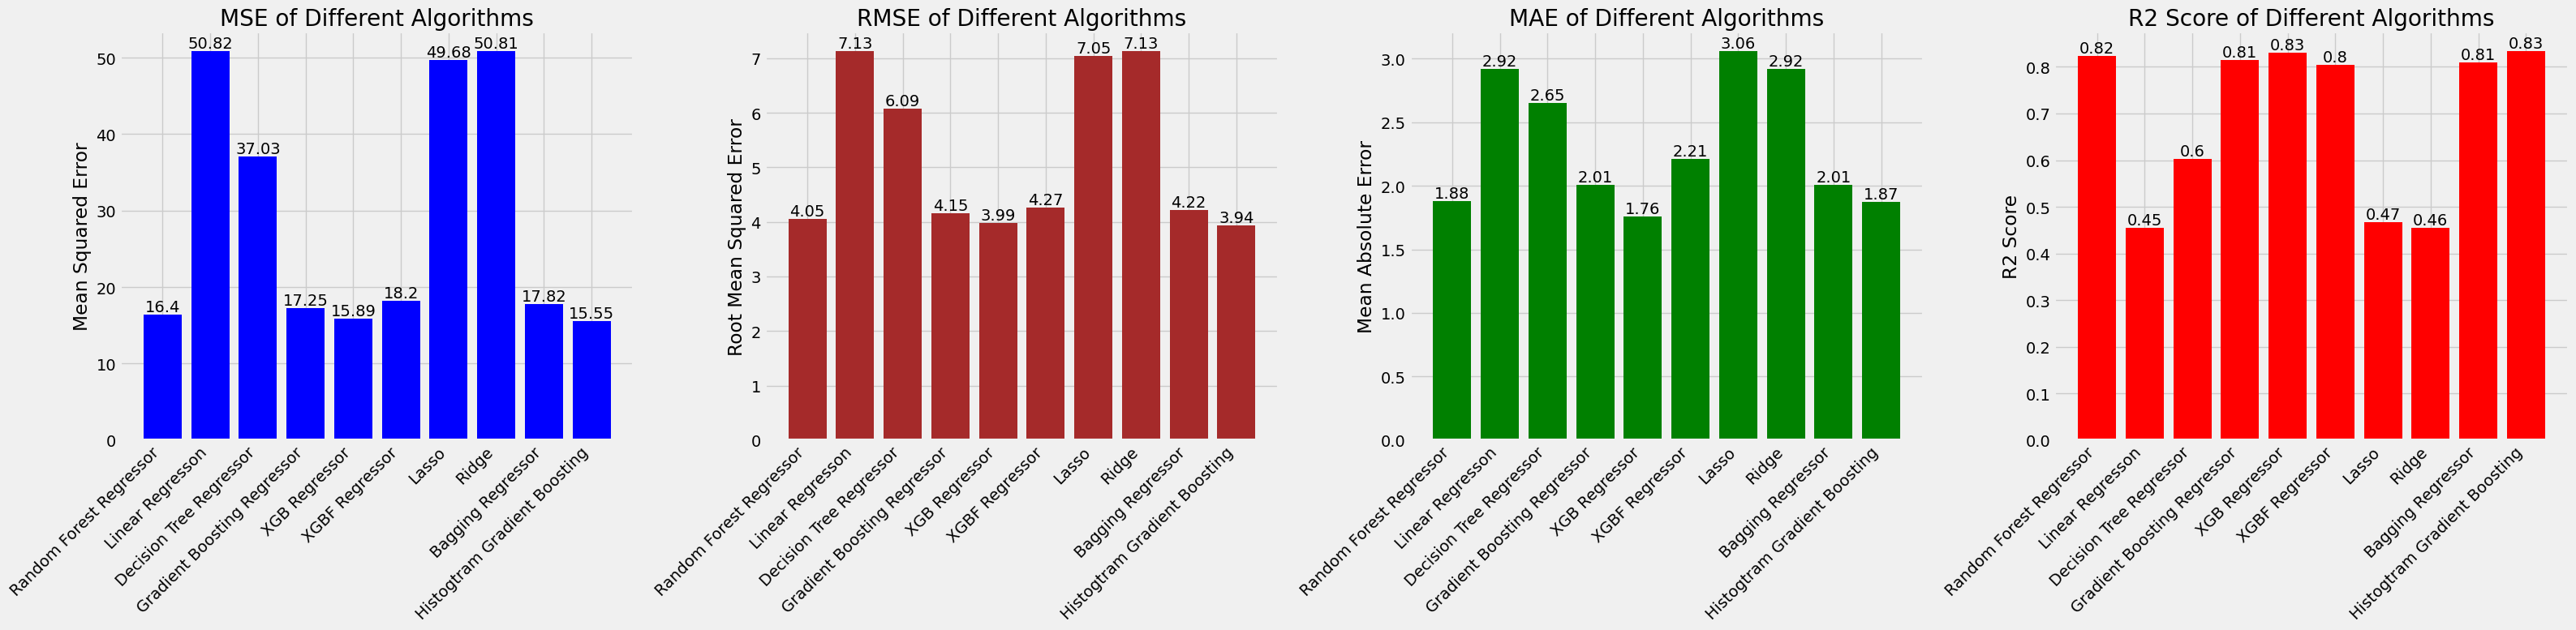

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(result)

# Plotting
plt.figure(figsize=(32, 8))

# Plot MSE
plt.subplot(1, 4, 1)
bars1 = plt.bar(results_df['model'], results_df['MSE'], color='blue')
plt.title('MSE of Different Algorithms')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Adding labels to each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom')  # Positioning the label
    
# Plot RMSE
plt.subplot(1, 4, 2)
bars2 = plt.bar(results_df['model'], results_df['RMSE'], color='brown')
plt.title('RMSE of Different Algorithms')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45, ha='right')  # Rotate labels

# Adding labels to each bar
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom')  # Positioning the label

# Plot MAE
plt.subplot(1, 4, 3)
bars3 = plt.bar(results_df['model'], results_df['MAE'], color='green')
plt.title('MAE of Different Algorithms')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45, ha='right')

# Adding labels to each bar
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom')

# Plot R2 Score
plt.subplot(1, 4, 4)
bars4 = plt.bar(results_df['model'], results_df['R2 Score'], color='red')
plt.title('R2 Score of Different Algorithms')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')

# Adding labels to each bar
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [36]:
import pickle

with open('taxi_fare.pkl', 'wb') as model_file:
    pickle.dump(xgbr, model_file)


In [37]:
Enter_Coordinates = folium.Map(location = [40.767937, -73.982155], titles = 'OpenStreetMap', zoom_start = 12)
popup = folium.LatLngPopup()
popup = folium.ClickForMarker()

Enter_Coordinates.add_child(popup)

Enter_Coordinates

In [38]:
Pickup_Finder = folium.Map(location = [40.767937, -73.982155], titles = 'OpenStreetMap', zoom_start = 12)

Pickup = [40.744075, -74.003197]
Drop_off = [40.7616, -73.9734]

points = []

for i in range(len(Pickup)):
    points.append([Pickup[i], Drop_off[i]])

print('Distance between Pickup and Dropoff : ', distance(Pickup[0], Pickup[1], Drop_off[0], Drop_off[1]))

folium.CircleMarker(Pickup, radius = 5, color = 'blue', popup = str([Pickup[0], Pickup[1]]), fill_color = '#FD8A6C').add_to(Pickup_Finder)
folium.CircleMarker(Drop_off, radius = 5, color = 'red', popup = str([Drop_off[0], Drop_off[1]]), fill_color = '#FD8A6C').add_to(Pickup_Finder)

for index, lat in enumerate(Pickup):
    folium.Marker([lat, Drop_off[index]], icon = folium.Icon(color = 'green', icon = 'plus')).add_to(Pickup_Finder)

folium.PolyLine([Pickup, Drop_off], color = 'green', weight = 3, opacity = 5).add_to(Pickup_Finder)

Pickup_Finder

Distance between Pickup and Dropoff :  1.9744617137237859


In [47]:
import tkinter as tk
import pandas as pd
import numpy as np
import folium
from tkinterweb import HtmlFrame
from geopy.distance import geodesic
import pickle

# Load the XGBoost model (ensure it's trained and saved beforehand)
xgbr = pickle.load(open("taxi_fare.pkl", "rb"))

# Define the window
window = tk.Tk()
window.title('New York City Taxi-Fare Prediction')
window.geometry('400x350')

# Define labels and entry fields
l1 = tk.Label(window, text='Pickup Coordinates (lat, lon)', padx=5, pady=5)
l1.grid(row=3, column=2)
pickup_value = tk.StringVar()
entry = tk.Entry(window, textvariable=pickup_value)
entry.grid(row=3, column=3)

l2 = tk.Label(window, text='Dropoff Coordinates (lat, lon)', padx=5, pady=5)
l2.grid(row=4, column=2)
dropoff_value = tk.StringVar()
entry2 = tk.Entry(window, textvariable=dropoff_value)
entry2.grid(row=4, column=3)

l3 = tk.Label(window, text='Date (MM/DD/YYYY)', padx=5, pady=5)
l3.grid(row=5, column=2)
date_value = tk.StringVar()
entry3 = tk.Entry(window, textvariable=date_value)
entry3.grid(row=5, column=3)

l4 = tk.Label(window, text='Number of Passengers', padx=5, pady=5)
l4.grid(row=6, column=2)
passenger_value = tk.StringVar()
entry4 = tk.Entry(window, textvariable=passenger_value)
entry4.grid(row=6, column=3)

l5 = tk.Label(window, text='Hour (0-23)', padx=5, pady=5)
l5.grid(row=7, column=2)
hour_value = tk.StringVar()
entry5 = tk.Entry(window, textvariable=hour_value)
entry5.grid(row=7, column=3)

l6 = tk.Label(window, text='Day of Week (0=Mon, 6=Sun)', padx=5, pady=5)
l6.grid(row=8, column=2)
week_value = tk.StringVar()
entry6 = tk.Entry(window, textvariable=week_value)
entry6.grid(row=8, column=3)

fare_label = tk.Label(window, text="Fare Amount:", padx=5, pady=5)
fare_label.grid(row=9, column=2)
fare_predict = tk.Entry(window)
fare_predict.grid(row=9, column=3)

distance_label = tk.Label(window, text="Distance:", padx=5, pady=5)
distance_label.grid(row=10, column=2)
distance_entry = tk.Entry(window)
distance_entry.grid(row=10, column=3)

data = pd.DataFrame()

def distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

def action():
    global data
    data = pd.DataFrame(columns=[
        'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
        'passenger_count', 'pickup_day', 'Pickup_hour', 'pickup_day_of_week',
        'pickup_month', 'pickup_year', 'distance_miles'
    ])
    
    pickup_coords = pickup_value.get().split(',')
    data.loc[0, 'pickup_latitude'] = float(pickup_coords[0])
    data.loc[0, 'pickup_longitude'] = float(pickup_coords[1])
    
    dropoff_coords = dropoff_value.get().split(',')
    data.loc[0, 'dropoff_latitude'] = float(dropoff_coords[0])
    data.loc[0, 'dropoff_longitude'] = float(dropoff_coords[1])
    
    data.loc[0, 'passenger_count'] = int(passenger_value.get())
    
    date_parts = date_value.get().split('/')
    data.loc[0, 'pickup_day'] = int(date_parts[1])
    data.loc[0, 'pickup_month'] = int(date_parts[0])
    data.loc[0, 'pickup_year'] = int(date_parts[2])
    
    data.loc[0, 'pickup_hour'] = int(hour_value.get())
    data.loc[0, 'pickup_day_of_week'] = int(week_value.get())
    
    pickup_lat = data.loc[0, 'pickup_latitude']
    pickup_lon = data.loc[0, 'pickup_longitude']
    dropoff_lat = data.loc[0, 'dropoff_latitude']
    dropoff_lon = data.loc[0, 'dropoff_longitude']

    data.loc[0, 'distance_miles'] = distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)

    ny_array = np.array([pickup_lon, pickup_lat, dropoff_lon, dropoff_lat, data.loc[0, 'passenger_count'], 
                     data.loc[0, 'pickup_day'], data.loc[0, 'pickup_hour'], data.loc[0, 'pickup_day_of_week'], 
                     data.loc[0, 'pickup_month'], data.loc[0, 'pickup_year'], data.loc[0, 'distance_miles']])
    
    predicted_fare = xgbr.predict(ny_array.reshape(1, -1))

    fare_predict.delete(0, tk.END)
    distance_entry.delete(0, tk.END)
    
    fare_predict.insert(0, f"{predicted_fare[0]:.2f}")
    distance_entry.insert(0, f"{data.loc[0, 'distance_miles']:.2f}")

    Pickup_Finder = folium.Map(location=[40.767937, -73.982155], zoom_start=12)

    Pickup = [data.loc[0, 'pickup_latitude'], data.loc[0, 'pickup_longitude']]
    Drop_off = [data.loc[0, 'dropoff_latitude'], data.loc[0, 'dropoff_longitude']]

    folium.CircleMarker(Pickup, radius=5, color='blue', fill_color='#FD8A6C').add_to(Pickup_Finder)
    folium.CircleMarker(Drop_off, radius=5, color='red', fill_color='#FD8A6C').add_to(Pickup_Finder)
    folium.PolyLine([Pickup, Drop_off], color='green', weight=3).add_to(Pickup_Finder)

    import os

    # Save the folium map as map.html in the current directory
    map_file = os.path.join(os.getcwd(), 'map.html')
    Pickup_Finder.save(map_file)

    # Load the map.html file into the HtmlFrame
    frame.load_file(map_file)

# Button to trigger the action
predict_button = tk.Button(window, text="Predict Fare", command=action)
predict_button.grid(row=15, column=2, columnspan=2)

frame = HtmlFrame(window, horizontal_scrollbar="auto")
frame.grid(row=16, column=0, columnspan=4, sticky="nsew")

window.grid_rowconfigure(16, weight=1)
window.grid_columnconfigure(0, weight=1)

# Start the tkinter main loop
window.mainloop()


Starting TkinterWeb for 64-bit Windows with Python 3.11.4.

Tkhtml3 successfully loaded from C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tkinterweb\tkhtml\binaries.

Welcome to TkinterWeb 3.24! 
https://github.com/Andereoo/TkinterWeb

Debugging messages are enabled. 
Use the parameter `messages_enabled = False` when calling HtmlFrame() to disable these messages.

Connecting to .

Loading <style> element.

Loading <style> element.

Loading stylesheet from https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css.

Loading stylesheet from https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css.

Loading stylesheet from https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css.

Loading stylesheet from https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css.

Loading stylesheet from https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css.

Loading stylesheet from https: